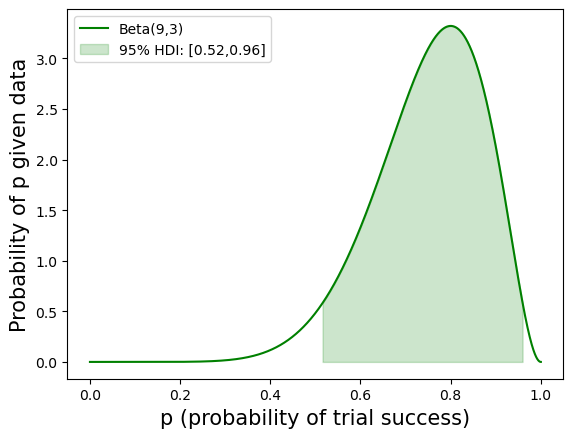

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_distribution
from operator import itemgetter

def hdi_unimodal(theta,dist,level=0.95):
    step = theta[1]-theta[0]
    epsilon = 1.5*step
    distribution = [[i,j] for i,j in zip(theta,dist)]
    distribution.sort(key=itemgetter(1),reverse=True)
    area = dist[0]*step
    hdi_lower, hdi_upper = distribution[0][0],distribution[0][0]
    for (x,y) in distribution[1:]:
        if abs(hdi_lower - x) < epsilon:
            hdi_lower = x
        elif abs(hdi_upper - x) < epsilon:
            hdi_upper = x
        else:
            raise Exception("Distribution is not unimodal or is not continous")
        area += y*step
        if area > level:
            break
    return hdi_lower,hdi_upper
    
def plot_beta(alpha,beta,color,level=0.95):
    theta = np.linspace(0,1,10001)
    dist = beta_distribution.pdf(theta,alpha,beta)
    hdi_lower, hdi_upper = hdi_unimodal(theta,dist)
    plt.plot(theta,dist,color,label=f"Beta({alpha},{beta})")
    plt.fill_between(theta,y1=dist,where=(hdi_lower<theta)&(theta<hdi_upper),color=color,alpha=0.2,label=f"{round(level*100)}% HDI: [{round(hdi_lower,2)},{round(hdi_upper,2)}]")

# scenario hyperparameters
scenario1_alpha, scenario1_beta = 0+1,0+1
scenario2_alpha, scenario2_beta = 8+1,2+1
scenario3_alpha, scenario3_beta = 80+1,20+1

# plot the uninformative prior and two posterior distributions
# plot_beta(scenario1_alpha, scenario1_beta,"red")
plot_beta(scenario2_alpha, scenario2_beta,"green")
# plot_beta(scenario3_alpha, scenario3_beta,"blue")
plt.xlabel('p (probability of trial success)',fontsize='15')
plt.ylabel('Probability of p given data',fontsize='15')
plt.legend()
plt.show()